In [ ]:
# https://adventofcode.com/2018/day/6

struct Point
    x::Int
    y::Int
end

function Point(line::String)
    coords = match(r"(\d+), (\d+)", line).captures
    Point(parse.(Int, coords)...)
end

function distance(p1::Point, p2::Point)
    abs(p2.x - p1.x) + abs(p2.y - p1.y)
end

data = open("6.txt") do file
    readlines(file) .|> Point
end


In [64]:
# part 1

width = maximum(p.x for p in data)
height = maximum(p.y for p in data)
grid = zeros(Int, width, height)

for i in 1:size(grid, 1), j in 1:size(grid, 2)
    p = Point(i, j)
    distances = sort([(distance(p, q), k) 
                      for (k, q) in enumerate(data)])
    
    # only color the point if there are no ties
    (d1, k), (d2, _) = distances
    if d1 != d2
        grid[i, j] = k
    end
end

# points on the border indicate infinite regions
border = [grid[1, 1:end]; 
          grid[end, 1:end]; 
          grid[1:end, 1]; 
          grid[1:end, end]] |> Set

maximum(sum(grid .== i)
        for (i, _) in enumerate(data)
        if i ∉ border)


5358

In [65]:
# part 2

sum(sum(distance(Point(i, j), p) for p in data) < 10000
    for i in 1:width
    for j in 1:height)


37093

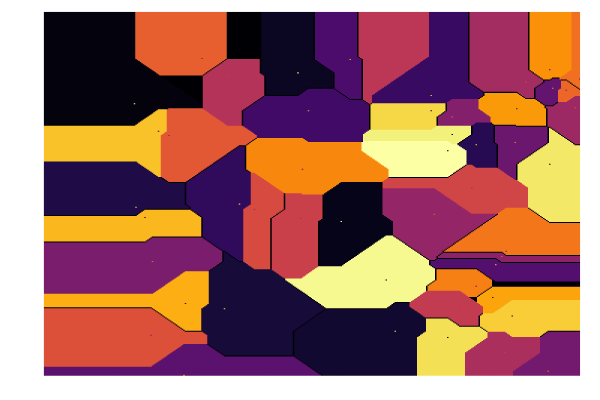

In [67]:
# visualization

import Plots

# inverse highlight the centroids
for (i, p) in enumerate(data)
    grid[p.x, p.y] = length(data) - i
end

Plots.heatmap(1:size(grid, 1), 
              1:size(grid, 2), 
              reverse(transpose(grid), dims=1), 
              legend=false, 
              xaxis=false, 
              yaxis=false)
